# show the dog annotation

In [8]:
from keras.preprocessing import image
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from scipy.misc import imread, imresize
%matplotlib inline 
import matplotlib.patches as patches
import xml.etree.ElementTree as ET

In [5]:
anno_file = "/Users/xuan/work/dataset/Annotation/n02085620-Chihuahua/n02085620_1346"
image_file = "/Users/xuan/work/dataset/dogs/n02085620/n02085620_1346.JPEG"

/Library/Python/2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


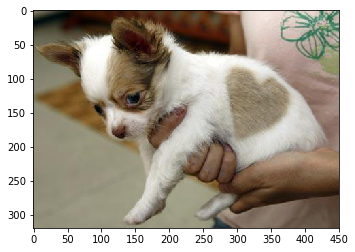

In [44]:
#plot the target image
plt.figure(0)
plt.imshow(imread(image_file))

In [10]:
!cat {anno_file}

<annotation>
	<folder>02085620</folder>
	<filename>n02085620_1346</filename>
	<source>
		<database>ImageNet database</database>
	</source>
	<size>
		<width>450</width>
		<height>320</height>
		<depth>3</depth>
	</size>
	<segment>0</segment>
	<object>
		<name>Chihuahua</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>1</xmin>
			<ymin>8</ymin>
			<xmax>432</xmax>
			<ymax>316</ymax>
		</bndbox>
	</object>
</annotation>

In [39]:
int("0")

0

In [40]:
# show the bound box
tree = ET.parse(anno_file)
objs = tree.getroot().findall("object")
boxes = [obj.find("bndbox") for obj in objs]
print boxes
rects = [(int(box.find("xmin").text), 
          int(box.find("ymin").text), 
          int(box.find("xmax").text), 
          int(box.find("ymax").text)) for box in boxes]

[<Element 'bndbox' at 0x1186a2e90>]


/Library/Python/2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


[(1, 8, 432, 316)]


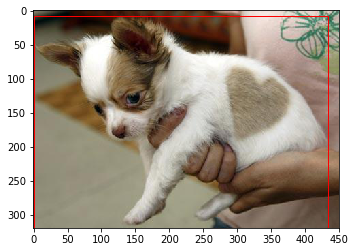

In [43]:
# draw the rect
_, ax = plt.subplots(1)
ax.imshow(imread(image_file))
print rects
ps = [patches.Rectangle((rect[0],rect[1]),rect[2],rect[3],linewidth=1,edgecolor='r',facecolor='none') for rect in rects]
[ax.add_patch(p) for p in ps]

plt.show()